Predicted classes for the training data:  [1 2 4 ... 3 2 1]
Training Set Metrics:
Precision: 0.95
Recall: 0.92
F1 Score: 0.93
Predicted classes for the test data:  [3 1 1 ... 1 1 3]


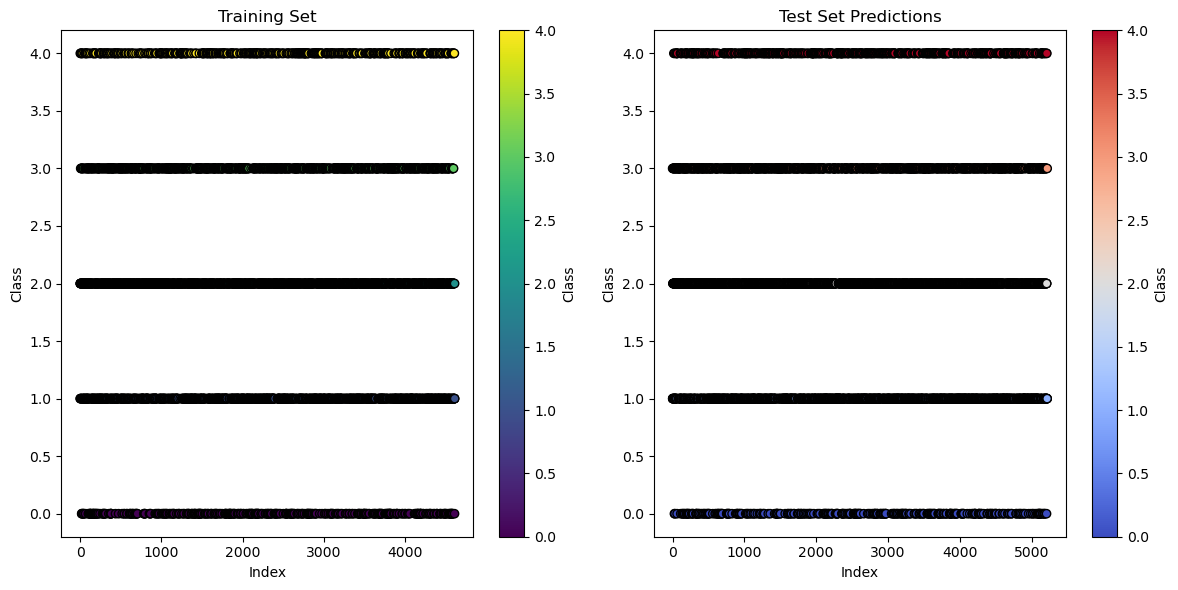

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# K-Nearest Neighbors Classifier
class KNN:
    def __init__(self, k=5):
        self.k = k  # Number of neighbors
        self.X_train = None
        self.Y_train = None

    # Function for model training
    def fit(self, X, Y):
        self.X_train = X
        self.Y_train = Y

    # Helper function to compute the Euclidean distance
    def euclidean_distance(self, a, b):
        return np.sqrt(np.sum((a - b) ** 2))

    # Function to predict the label of a test example
    def predict(self, X_test):
        predictions = []
        for x in X_test:
            predictions.append(self._predict(x))
        return np.array(predictions)

    # Helper function to predict a single example
    def _predict(self, x):
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        # Get the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Get the labels of the k nearest neighbors
        k_nearest_labels = [self.Y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

    # Function to calculate accuracy
    def accuracy(self, X_test, Y_test):
        predictions = self.predict(X_test)
        accuracy = np.mean(predictions == Y_test) * 100
        return accuracy

# Function to normalize features
def normalize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Function to calculate precision, recall, and F1 score
def calculate_metrics(y_true, y_pred):
    unique_classes = np.unique(y_true)
    precision_list = []
    recall_list = []
    f1_list = []

    for cls in unique_classes:
        tp = np.sum((y_true == cls) & (y_pred == cls))  # True positives
        fp = np.sum((y_true != cls) & (y_pred == cls))  # False positives
        fn = np.sum((y_true == cls) & (y_pred != cls))  # False negatives

        precision = tp / (tp + fp) if tp + fp > 0 else 0
        recall = tp / (tp + fn) if tp + fn > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1 = np.mean(f1_list)

    return avg_precision, avg_recall, avg_f1

# Driver code
def main():
    # Input training and testing dataset paths
    train_path = "multi_classification_train.csv"
    test_path = "multi_classification_test.csv"

    # Importing datasets using pandas
    train_data = pd.read_csv(train_path)
    test_data = pd.read_csv(test_path)

    # Splitting features and labels for training and testing data
    X_train = train_data.iloc[:, 1:-1].values  # Exclude ID and Class columns (20 features)
    Y_train = train_data.iloc[:, -1].values.astype(int)  # Training labels

    X_test = test_data.iloc[:, 1:].values  # Exclude ID column (20 features)

    # Normalize features
    X_train = normalize(X_train)
    X_test = normalize(X_test)

    # Model training
    model = KNN(k=5)
    model.fit(X_train, Y_train)

    # Prediction on training set
    Y_train_pred = model.predict(X_train)

    # Print predictions for training set
    print("Predicted classes for the training data: ", Y_train_pred)

    # Calculate and print metrics for training set
    precision, recall, f1 = calculate_metrics(Y_train, Y_train_pred)
    print("Training Set Metrics:")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Prediction on test set
    Y_test_pred = model.predict(X_test)

    # Print predictions for test set
    print("Predicted classes for the test data: ", Y_test_pred)

    # Visualization
    plt.figure(figsize=(12, 6))

    # Training set visualization
    plt.subplot(1, 2, 1)
    plt.scatter(range(len(Y_train)), Y_train, c=Y_train, cmap='viridis', edgecolor='k')
    plt.title('Training Set')
    plt.xlabel('Index')
    plt.ylabel('Class')
    plt.colorbar(label='Class')

    # Test set predictions visualization
    plt.subplot(1, 2, 2)
    plt.scatter(range(len(Y_test_pred)), Y_test_pred, c=Y_test_pred, cmap='coolwarm', edgecolor='k', label='Predicted')
    plt.title('Test Set Predictions')
    plt.xlabel('Index')
    plt.ylabel('Class')
    plt.colorbar(label='Class')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
